In [22]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline



In [23]:

df = pd.read_csv("Loan_default.csv")
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
display(df.head())


display(df.info())

print(df.isnull().sum().sum())

Dataset shape: (255347, 18)

First 5 rows:


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

None

0


- Default Rate
Overall default rate: 11.61%


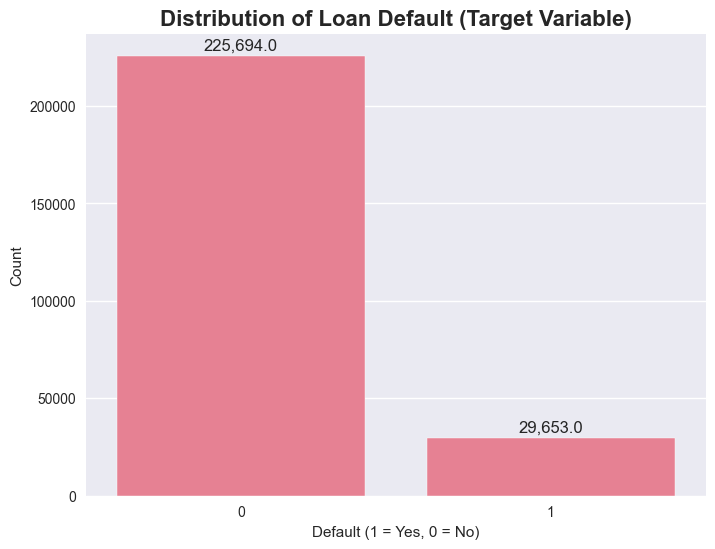

In [24]:

print("- Default Rate")
default_rate = df['Default'].mean() * 100
print(f"Overall default rate: {default_rate:.2f}%")

plt.figure(figsize=(8,6))
ax = sns.countplot(x='Default', data=df, order=[0,1])
plt.title('Distribution of Loan Default (Target Variable)', fontsize=16, fontweight='bold')
plt.xlabel('Default (1 = Yes, 0 = No)')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(f'{p.get_height():,}', (p.get_x()+0.4, p.get_height()+3000), ha='center', fontsize=12)
plt.show()

In [25]:

numeric_cols = df.select_dtypes(include=np.number).columns.drop('Default')
desc_stats = df[numeric_cols].describe().T
desc_stats = desc_stats[['min', '25%', '50%', '75%', 'mean', 'std']]
desc_stats.columns = ['Minimum', 'Q1', 'Median', 'Q3', 'Mean', 'Std Dev']
desc_stats = desc_stats.round(2)

print("STATISTICS FOR NUMERIC VARIABLES")
display(desc_stats)

STATISTICS FOR NUMERIC VARIABLES


,Minimum,Q1,Median,Q3,Mean,Std Dev
Age,18.0,31.00,43.00,56.00,43.50,14.99
Income,15000.0,48825.50,82466.00,116219.00,82499.30,38963.01
LoanAmount,5000.0,66156.00,127556.00,188985.00,127578.87,70840.71
CreditScore,300.0,437.00,574.00,712.00,574.26,158.90
MonthsEmployed,0.0,30.00,60.00,90.00,59.54,34.64
NumCreditLines,1.0,2.00,2.00,3.00,2.50,1.12
InterestRate,2.0,7.77,13.46,19.25,13.49,6.64
LoanTerm,12.0,24.00,36.00,48.00,36.03,16.97
DTIRatio,0.1,0.30,0.50,0.70,0.50,0.23


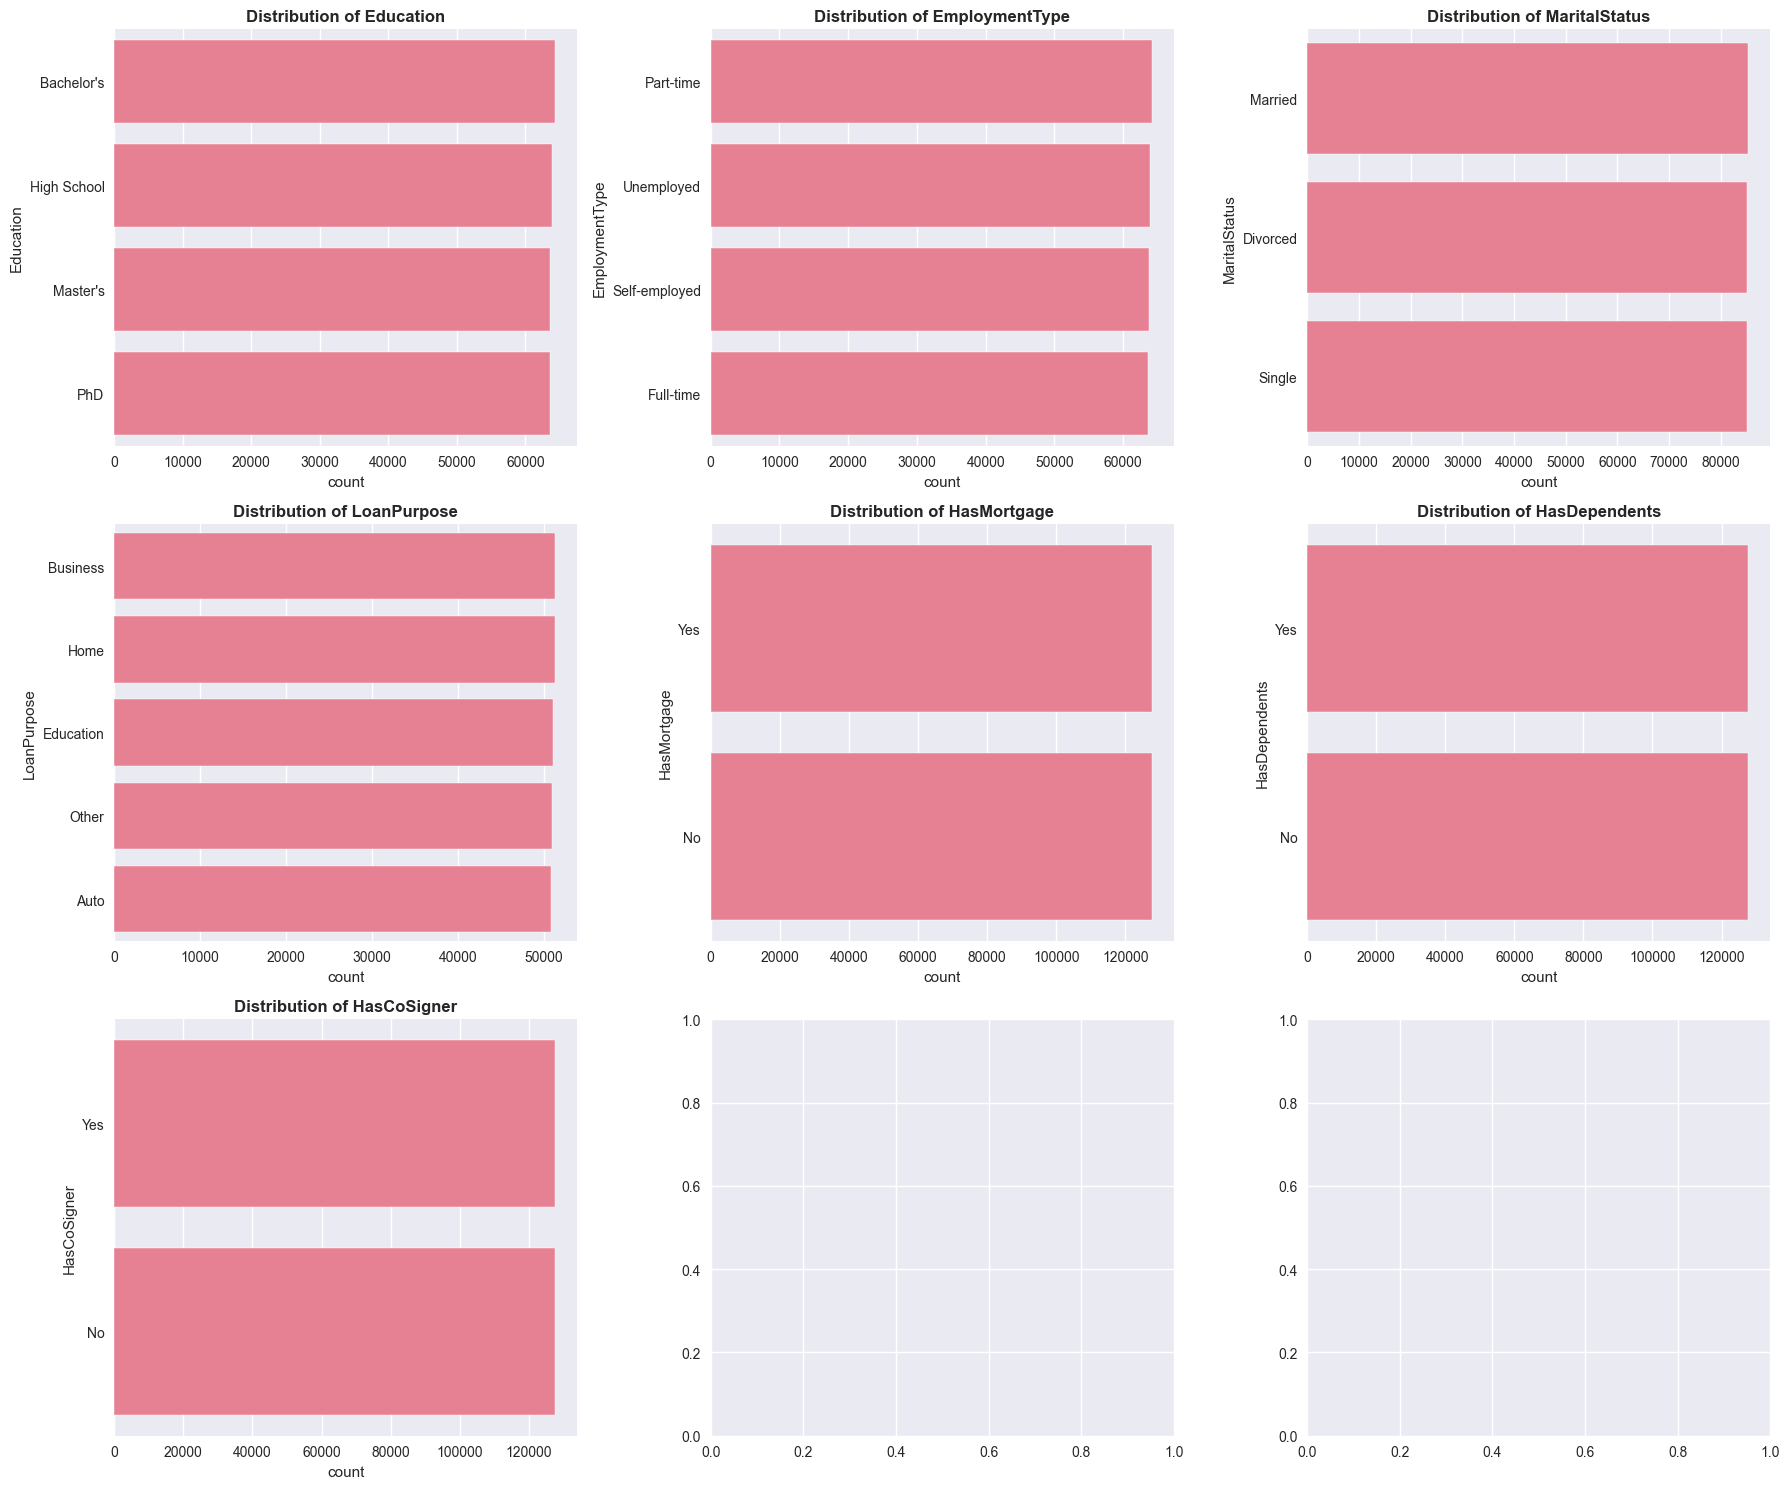

In [26]:
cat_cols = ['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose',
            'HasMortgage', 'HasDependents', 'HasCoSigner']

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()
for i, col in enumerate(cat_cols):
    sns.countplot(y=col, data=df, order=df[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontweight='bold')
plt.tight_layout()
plt.show()

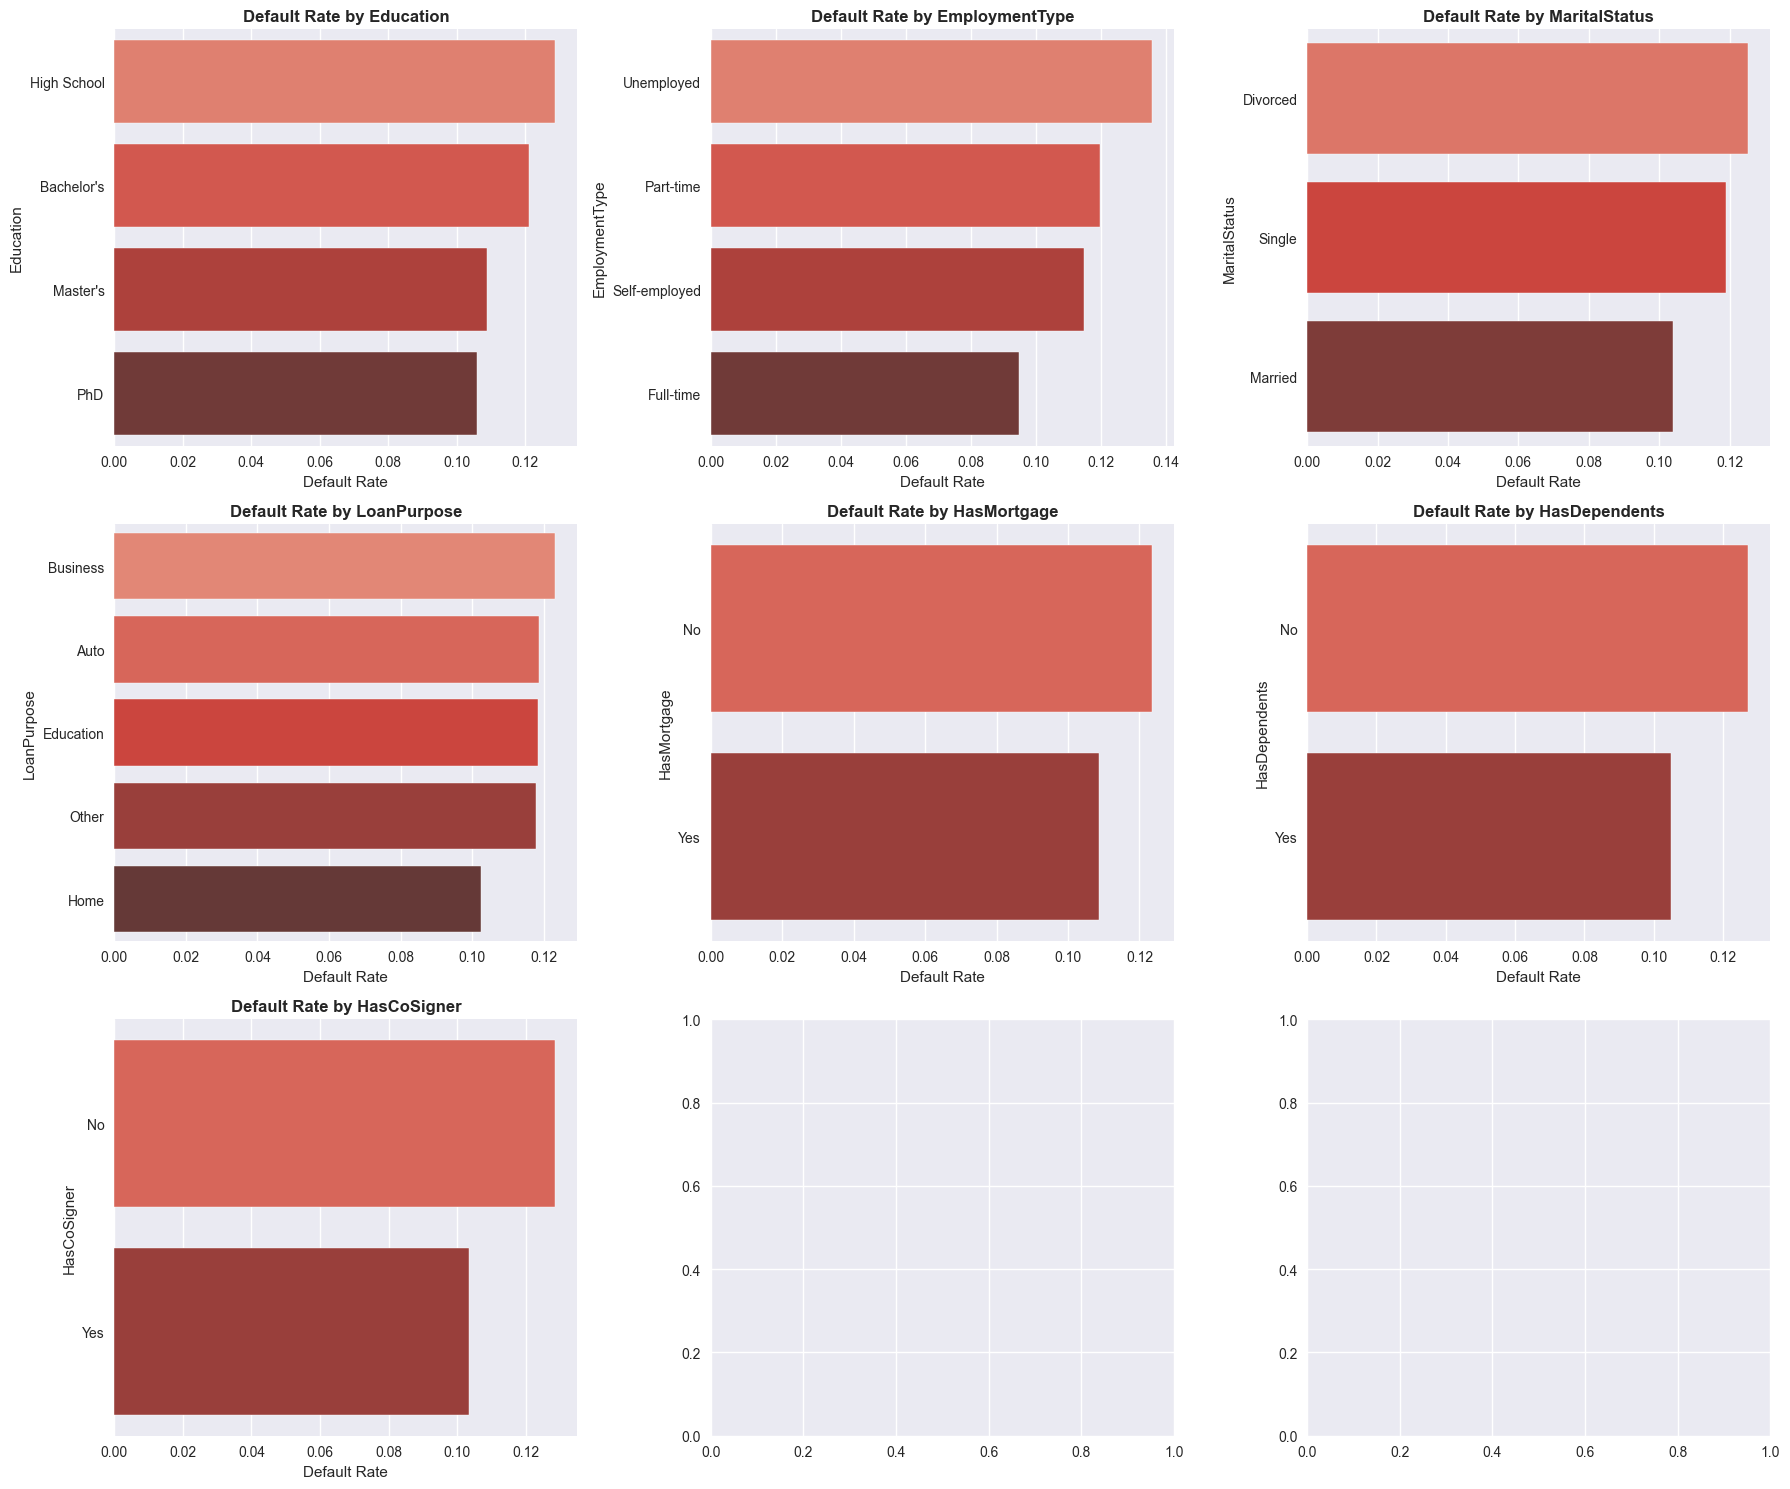

In [27]:
#Default Rate by Categorical Variables (Key Insight Plots)
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()
for i, col in enumerate(cat_cols):
    default_by_cat = df.groupby(col)['Default'].mean().sort_values(ascending=False)
    sns.barplot(x=default_by_cat.values, y=default_by_cat.index, ax=axes[i], palette="Reds_d")
    axes[i].set_title(f'Default Rate by {col}', fontweight='bold')
    axes[i].set_xlabel('Default Rate')
plt.tight_layout()
plt.show()

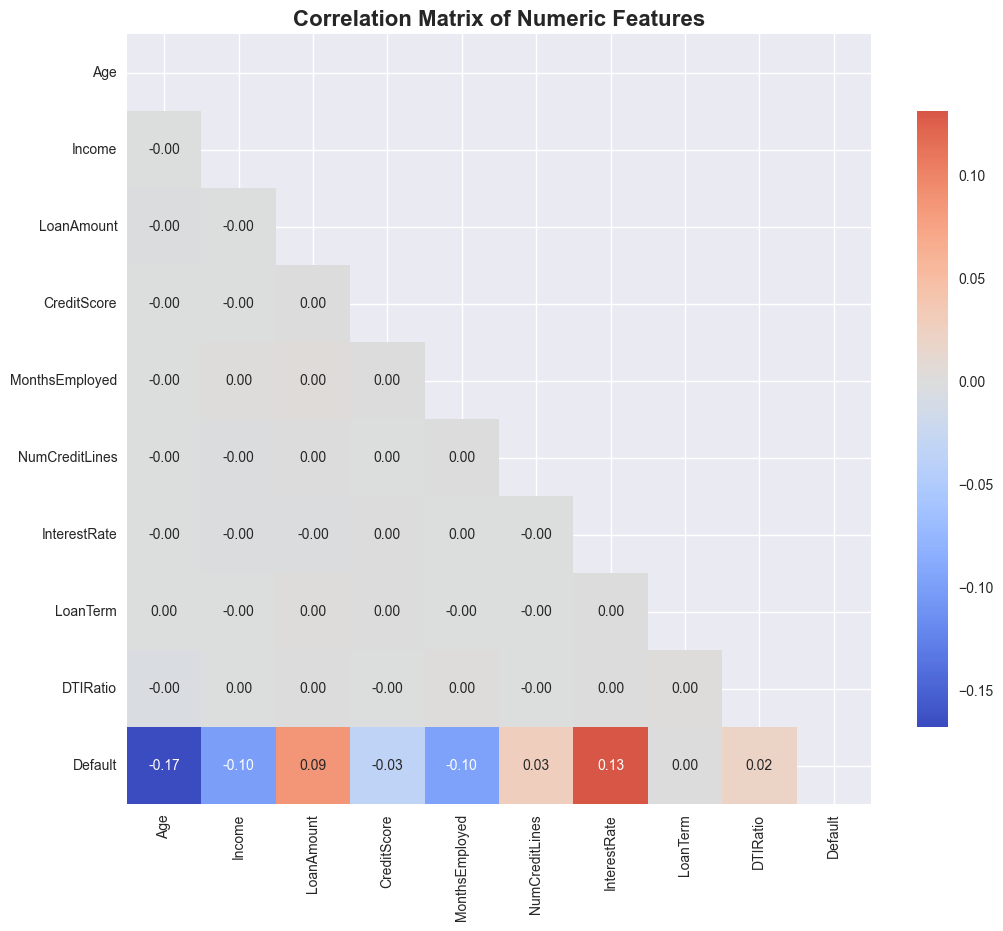

In [28]:

plt.figure(figsize=(12,10))
corr = df.select_dtypes(include=np.number).corr()
mask = np.triu(corr)
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, mask=mask, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix of Numeric Features', fontsize=16, fontweight='bold')
plt.show()

In [29]:

df_clean = df.drop('LoanID', axis=1).copy()

categorical_cols = ['Education', 'EmploymentType', 'MaritalStatus',
                    'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']

df_clean = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True, dtype=int)

display(df_clean.head(10).style
        .set_table_attributes("style='display:inline'")
        .set_caption("Final Dataset Ready for Logistic Regression")
        .background_gradient(cmap='Blues', low=0.3, high=0.9))

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default,Education_High School,Education_Master's,Education_PhD,EmploymentType_Part-time,EmploymentType_Self-employed,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes
0,56,85994,50587,520,80,4,15.230000,36,0.440000,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1
1,69,50432,124440,458,15,1,4.810000,60,0.680000,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1
2,46,84208,129188,451,26,3,21.170000,24,0.310000,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0
3,32,31713,44799,743,0,3,7.070000,24,0.230000,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,60,20437,9139,633,8,4,6.510000,48,0.730000,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
5,25,90298,90448,720,18,2,22.720000,24,0.100000,1,1,0,0,0,0,1,0,1,1,0,1,0,0,0,1
6,38,111188,177025,429,80,1,19.110000,12,0.160000,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1
7,56,126802,155511,531,67,4,8.150000,60,0.430000,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1
8,36,42053,92357,827,83,1,23.940000,48,0.200000,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
9,40,132784,228510,480,114,4,9.090000,48,0.330000,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,1


In [30]:

from sklearn.model_selection import train_test_split

X = df_clean.drop('Default', axis=1)
y = df_clean['Default']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=530, stratify=y
)

print(f"Training set: {X_train.shape[0]:,} rows")
print(f"Test set:     {X_test.shape[0]:,} rows")
print(f"Default rate in train: {y_train.mean():.4f}")
print(f"Default rate in test:  {y_test.mean():.4f}")

Training set: 204,277 rows
Test set:     51,070 rows
Default rate in train: 0.1161
Default rate in test:  0.1161


In [31]:
import statsmodels.api as sm
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

logit_model = sm.Logit(y_train, X_train_sm).fit()
print(logit_model.summary())

y_prob = logit_model.predict(X_test_sm)





Optimization terminated successfully.
         Current function value: 0.315911
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:               204277
Model:                          Logit   Df Residuals:                   204252
Method:                           MLE   Df Model:                           24
Date:                Thu, 27 Nov 2025   Pseudo R-squ.:                  0.1204
Time:                        19:09:12   Log-Likelihood:                -64533.
converged:                       True   LL-Null:                       -73363.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.4546      0.059     -7.692      0.000

In [32]:

threshold = 0.11
y_pred = (y_prob >= threshold).astype(int)


print(classification_report(y_test, y_pred))
print("CONFUSION MATRIX")
print(confusion_matrix(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_prob)
print(f"\nROC-AUC Score: {roc_auc:.4f}")

              precision    recall  f1-score   support

           0       0.94      0.65      0.77     45139
           1       0.21      0.71      0.33      5931

    accuracy                           0.66     51070
   macro avg       0.58      0.68      0.55     51070
weighted avg       0.86      0.66      0.72     51070

CONFUSION MATRIX
[[29377 15762]
 [ 1717  4214]]

ROC-AUC Score: 0.7478


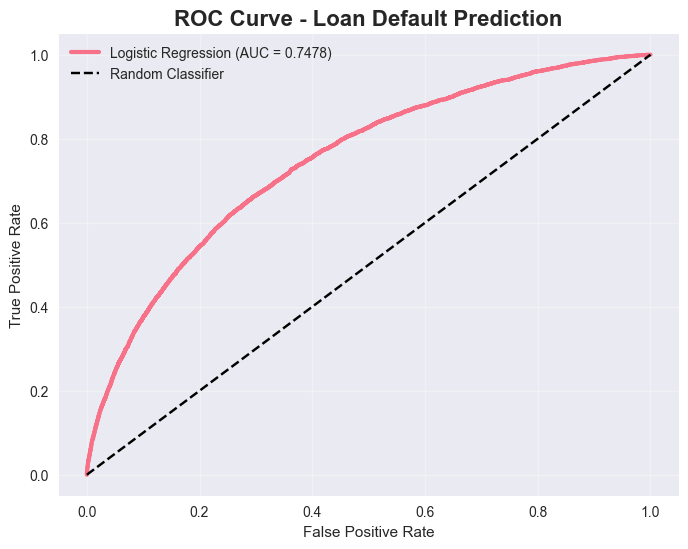

In [33]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.4f})', linewidth=3)
plt.plot([0,1], [0,1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Loan Default Prediction', fontsize=16, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

TOP PREDICTORS OF DEFAULT (by Odds Ratio)


,Feature,Coefficient,Odds_Ratio
EmploymentType_Unemployed,EmploymentType_Unemployed,0.440346,1.553244
EmploymentType_Part-time,EmploymentType_Part-time,0.284619,1.329256
DTIRatio,DTIRatio,0.264274,1.302485
EmploymentType_Self-employed,EmploymentType_Self-employed,0.241487,1.273141
NumCreditLines,NumCreditLines,0.087193,1.091107
Education_High School,Education_High School,0.077412,1.080487
InterestRate,InterestRate,0.068532,1.070935
LoanPurpose_Business,LoanPurpose_Business,0.034726,1.035336
LoanTerm,LoanTerm,0.000244,1.000244
LoanAmount,LoanAmount,0.000004,1.000004



TOP PROTECTIVE FACTORS (lowest Odds Ratio)


,Feature,Coefficient,Odds_Ratio
LoanPurpose_Other,LoanPurpose_Other,-0.013880,0.986216
Age,Age,-0.039531,0.961240
MaritalStatus_Single,MaritalStatus_Single,-0.060673,0.941131
Education_Master's,Education_Master's,-0.136427,0.872470
HasMortgage_Yes,HasMortgage_Yes,-0.143510,0.866312
Education_PhD,Education_PhD,-0.179623,0.835585
LoanPurpose_Home,LoanPurpose_Home,-0.198801,0.819713
MaritalStatus_Married,MaritalStatus_Married,-0.234925,0.790630
HasDependents_Yes,HasDependents_Yes,-0.251322,0.777772
HasCoSigner_Yes,HasCoSigner_Yes,-0.273778,0.760501


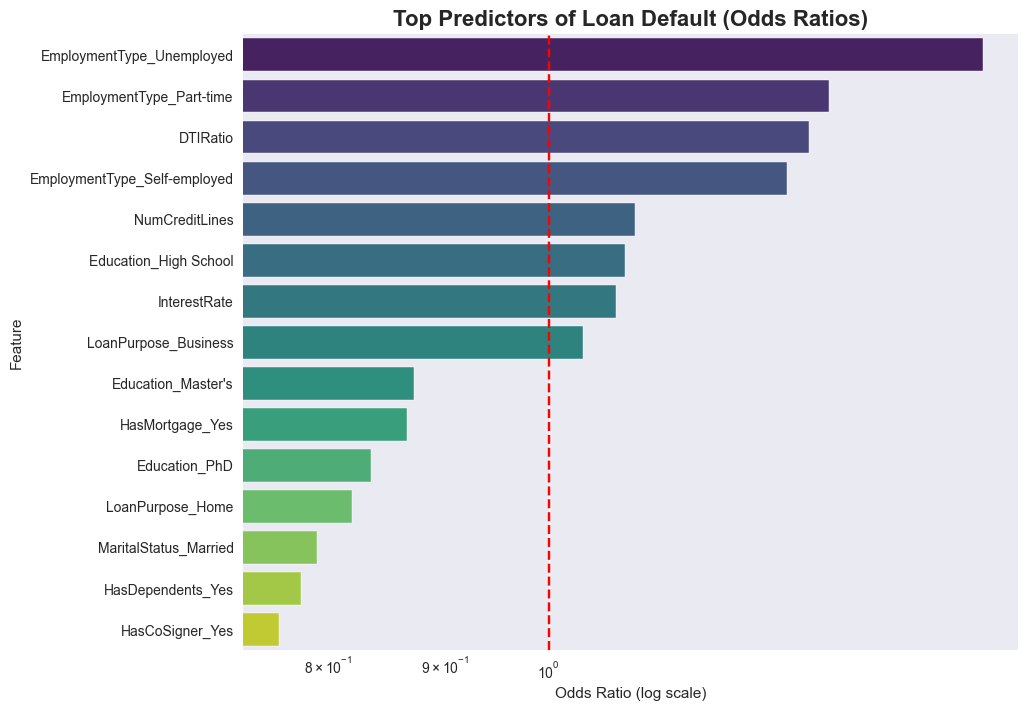

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

coef_df = pd.DataFrame({
    'Feature': X_train_sm.columns,
    'Coefficient': logit_model.params,
    'Odds_Ratio': np.exp(logit_model.params)
}).sort_values(by='Odds_Ratio', ascending=False)

coef_df_no_const = coef_df[coef_df['Feature'] != 'const']

print("TOP PREDICTORS OF DEFAULT (by Odds Ratio)")
display(coef_df_no_const.head(10))

print("\nTOP PROTECTIVE FACTORS (lowest Odds Ratio)")
display(coef_df_no_const.tail(10))

top15 = pd.concat([coef_df_no_const.head(8), coef_df_no_const.tail(7)])
plt.figure(figsize=(10,8))
sns.barplot(data=top15, y='Feature', x='Odds_Ratio', palette='viridis')
plt.xscale('log')
plt.title('Top Predictors of Loan Default (Odds Ratios)', fontsize=16, fontweight='bold')
plt.xlabel('Odds Ratio (log scale)')
plt.axvline(x=1, color='red', linestyle='--')
plt.show()


In [35]:
print("\nModel Diagnostics (Classification Report and Confusion Matrix):")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Diagnostics (Classification Report and Confusion Matrix):
Confusion Matrix:
[[29377 15762]
 [ 1717  4214]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.65      0.77     45139
           1       0.21      0.71      0.33      5931

    accuracy                           0.66     51070
   macro avg       0.58      0.68      0.55     51070
weighted avg       0.86      0.66      0.72     51070



In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import pandas as pd

# ---- MODEL 3: SKLEARN LOGIT WITH CLASS WEIGHTING ----

clf_bal = LogisticRegression(class_weight='balanced', max_iter=2000)
clf_bal.fit(X_train, y_train)

# Predicted probabilities
y_prob_bal = clf_bal.predict_proba(X_test)[:, 1]

# Predicted classes at threshold = 0.5
y_pred_bal = (y_prob_bal >= 0.5).astype(int)

# ---- COEFFICIENT TABLE ----
coef_df_bal = pd.DataFrame({
    'Feature': ['Intercept'] + list(X_train.columns),
    'Coefficient': [clf_bal.intercept_[0]] + list(clf_bal.coef_[0])
})

print("\n=== Coefficients (Balanced Logistic Regression) ===")
print(coef_df_bal)

# ---- METRICS ----
print("\n=== Classification Report (Balanced Model) ===")
print(classification_report(y_test, y_pred_bal))

print("\n=== Confusion Matrix (Balanced Model) ===")
print(confusion_matrix(y_test, y_pred_bal))

auc_bal = roc_auc_score(y_test, y_prob_bal)
print(f"\n=== ROC-AUC (Balanced Model): {auc_bal:.4f} ===")






=== Coefficients (Balanced Logistic Regression) ===
                         Feature  Coefficient
0                      Intercept     0.173913
1                            Age    -0.035375
2                         Income    -0.000006
3                     LoanAmount     0.000005
4                    CreditScore    -0.000116
5                 MonthsEmployed    -0.008816
6                 NumCreditLines     0.151767
7                   InterestRate     0.077483
8                       LoanTerm     0.005036
9                       DTIRatio     0.160062
10         Education_High School     0.199093
11            Education_Master's    -0.056974
12                 Education_PhD    -0.094546
13      EmploymentType_Part-time     0.094154
14  EmploymentType_Self-employed     0.045383
15     EmploymentType_Unemployed     0.283935
16         MaritalStatus_Married    -0.148091
17          MaritalStatus_Single     0.098049
18               HasMortgage_Yes    -0.109098
19             HasDependent

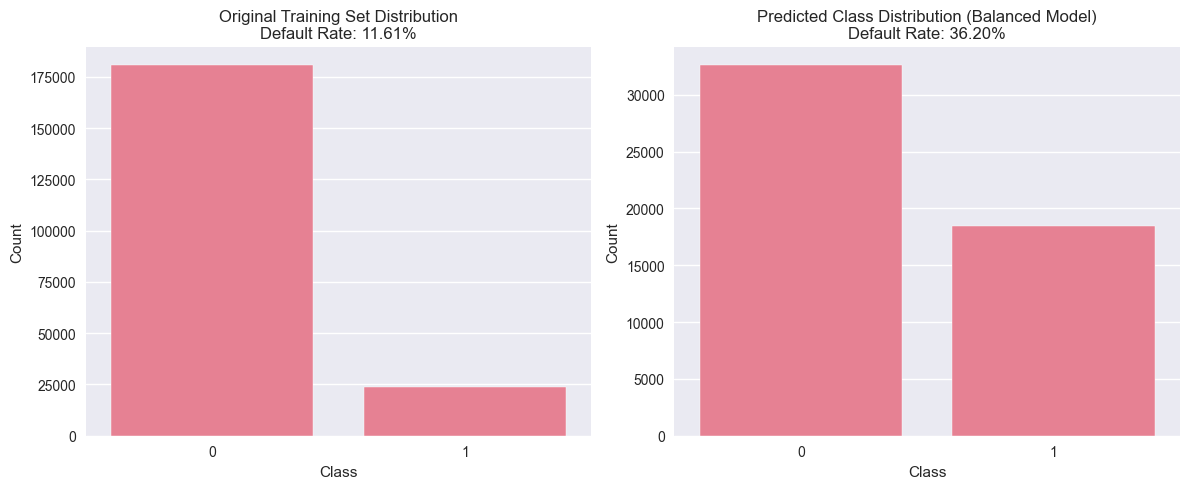

In [17]:

import matplotlib.pyplot as plt
import seaborn as sns

# Function to add default rate annotation
def add_default_rate(ax, y, title):
    default_rate = 100 * sum(y) / len(y)
    ax.set_title(f"{title}\nDefault Rate: {default_rate:.2f}%")
    ax.set_xlabel("Class")
    ax.set_ylabel("Count")

# --- Plot Original Training Distribution ---
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
ax1 = sns.countplot(x=y_train)
add_default_rate(ax1, y_train, "Original Training Set Distribution")

# --- Plot Predicted Distribution (Balanced Model) ---
plt.subplot(1,2,2)
ax2 = sns.countplot(x=y_pred_bal)
add_default_rate(ax2, y_pred_bal, "Predicted Class Distribution (Balanced Model)")

plt.tight_layout()
plt.show()




Fitting Model with 'Loan-to-Income' variable...

MODEL DIAGNOSTICS: IMPACT OF NEW VARIABLE (LTI RATIO)


,Metric,Original Model,Model w/ LTI Ratio
0,ROC-AUC Score (Higher is better),0.7478,0.7576
1,AIC (Lower is better),129116.7987,127296.6615
2,BIC (Lower is better),129372.4795,127562.5695



Analysis of new variable 'LTI_Ratio':
Coefficient: 0.2112
P-Value:     0.0000e+00
RESULT: The Loan-to-Income Ratio is STATISTICALLY SIGNIFICANT.


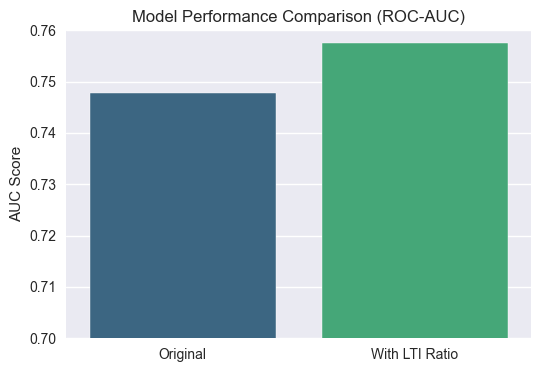

In [37]:
#FEATURE ENGINEERING & MODEL DIAGNOSTICS
from sklearn.metrics import roc_auc_score

X_train_new = X_train.copy()
X_test_new = X_test.copy()

X_train_new['LTI_Ratio'] = X_train_new['LoanAmount'] / X_train_new['Income']
X_test_new['LTI_Ratio'] = X_test_new['LoanAmount'] / X_test_new['Income']


X_train_new_sm = sm.add_constant(X_train_new)
X_test_new_sm = sm.add_constant(X_test_new)

print("Fitting Model with 'Loan-to-Income' variable...")
logit_model_lti = sm.Logit(y_train, X_train_new_sm).fit(disp=0)


y_prob_a = logit_model.predict(X_test_sm)
auc_a = roc_auc_score(y_test, y_prob_a)
aic_a = logit_model.aic


y_prob_b = logit_model_lti.predict(X_test_new_sm)
auc_b = roc_auc_score(y_test, y_prob_b)
aic_b = logit_model_lti.aic


comparison_df = pd.DataFrame({
    'Metric': ['ROC-AUC Score (Higher is better)', 'AIC (Lower is better)', 'BIC (Lower is better)'],
    'Original Model': [auc_a, aic_a, logit_model.bic],
    'Model w/ LTI Ratio': [auc_b, aic_b, logit_model_lti.bic]
})

print("\n" + "="*60)
print("MODEL DIAGNOSTICS: IMPACT OF NEW VARIABLE (LTI RATIO)")
print("="*60)
display(comparison_df.round(4))


lti_coef = logit_model_lti.params['LTI_Ratio']
lti_pvalue = logit_model_lti.pvalues['LTI_Ratio']

print(f"\nAnalysis of new variable 'LTI_Ratio':")
print(f"Coefficient: {lti_coef:.4f}")
print(f"P-Value:     {lti_pvalue:.4e}")
if lti_pvalue < 0.05:
    print("RESULT: The Loan-to-Income Ratio is STATISTICALLY SIGNIFICANT.")
else:
    print("RESULT: The Loan-to-Income Ratio is NOT statistically significant.")


plt.figure(figsize=(6, 4))
sns.barplot(x=['Original', 'With LTI Ratio'], y=[auc_a, auc_b], palette='viridis')
plt.ylim(0.7, 0.76)
plt.title('Model Performance Comparison (ROC-AUC)')
plt.ylabel('AUC Score')
plt.show()

In [38]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, f1_score, roc_auc_score


print("="*80)
print("                       LOGISTIC REGRESSION MODEL SUMMARY (WITH LTI)")
print("="*80)
print(logit_model_lti.summary())



y_prob_new = logit_model_lti.predict(X_test_new_sm)


THRESHOLD = 0.11
y_pred_new = (y_prob_new >= THRESHOLD).astype(int)


roc_auc_new = roc_auc_score(y_test, y_prob_new)
accuracy_new = accuracy_score(y_test, y_pred_new)
recall_new = recall_score(y_test, y_pred_new)
f1_new = f1_score(y_test, y_pred_new)

print("\n" + "="*60)
print(f"PERFORMANCE METRICS (Threshold = {THRESHOLD})")
print("="*60)
print(f"ROC-AUC Score: {roc_auc_new:.4f}")
print(f"Accuracy:      {accuracy_new:.4f}")
print(f"Recall (1):    {recall_new:.4f}")
print(f"F1 Score (1):  {f1_new:.4f}")
print("-" * 60)


print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred_new))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_new))

                       LOGISTIC REGRESSION MODEL SUMMARY (WITH LTI)
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:               204277
Model:                          Logit   Df Residuals:                   204251
Method:                           MLE   Df Model:                           25
Date:                Thu, 27 Nov 2025   Pseudo R-squ.:                  0.1328
Time:                        19:10:01   Log-Likelihood:                -63622.
converged:                       True   LL-Null:                       -73363.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -1.1314      0.062    -18.269      0.000      -1.253      -1.010
Age      

In [20]:
#Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Initialize Random Forest with constrained depth to prevent overfitting
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=530)

# Fit the model
print("Training Random Forest Model...")
rf_model.fit(X_train, y_train)

# Get probabilities for the positive class (Default = 1)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Calculate and print just the AUC first to check basic performance
rf_auc = roc_auc_score(y_test, y_prob_rf)
print(f"Random Forest ROC-AUC Score: {rf_auc:.4f}")

Training Random Forest Model...
Random Forest ROC-AUC Score: 0.7473


In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, f1_score

# Define the same threshold used in your Logistic Regression for fair comparison
THRESHOLD = 0.11

# Convert probabilities to binary predictions based on threshold
y_pred_rf = (y_prob_rf >= THRESHOLD).astype(int)

# Calculate key metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Print the Summary Report
print("\n" + "="*60)
print(f"RANDOM FOREST METRICS SUMMARY (Threshold = {THRESHOLD})")
print("="*60)
print(f"ROC-AUC Score: {rf_auc:.4f}")
print(f"Accuracy:      {accuracy_rf:.4f}")
print(f"Recall (1):    {recall_rf:.4f}")
print(f"F1 Score (1):  {f1_rf:.4f}")
print("-" * 60)

# Print Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Print Detailed Classification Report
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred_rf))


RANDOM FOREST METRICS SUMMARY (Threshold = 0.11)
ROC-AUC Score: 0.7473
Accuracy:      0.6348
Recall (1):    0.7360
F1 Score (1):  0.3188
------------------------------------------------------------

Confusion Matrix:
[[28052 17087]
 [ 1566  4365]]

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.62      0.75     45139
           1       0.20      0.74      0.32      5931

    accuracy                           0.63     51070
   macro avg       0.58      0.68      0.53     51070
weighted avg       0.86      0.63      0.70     51070



In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_binned_residuals(y_true, y_prob, n_bins=50):
    data = pd.DataFrame({'y_true': y_true, 'y_prob': y_prob})

    # Create bins based on predicted probability
    data['bin'] = pd.qcut(data['y_prob'], q=n_bins, duplicates='drop')

    binned = data.groupby('bin', observed=False).agg({
        'y_prob': 'mean',
        'y_true': ['mean', 'count']
    })

    binned.columns = ['avg_prob', 'avg_actual', 'count']

    # Calculate Residuals (Actual - Predicted)
    binned['residual'] = binned['avg_actual'] - binned['avg_prob']

    # Calculate standard error bounds (approx 95% CI)
    binned['se'] = np.sqrt(binned['avg_prob'] * (1 - binned['avg_prob']) / binned['count'])
    binned['upper'] = 2 * binned['se']
    binned['lower'] = -2 * binned['se']

    plt.figure(figsize=(10, 6))

    # Plot residuals
    plt.scatter(binned['avg_prob'], binned['residual'], alpha=0.6, color='blue', label='Binned Residuals')

    # Plot 2-SE bounds
    plt.plot(binned['avg_prob'], binned['upper'], 'r--', alpha=0.5, label='95% Error Bounds')
    plt.plot(binned['avg_prob'], binned['lower'], 'r--', alpha=0.5)

    plt.axhline(0, color='black', linestyle='-', linewidth=1)

    plt.title('Binned Residual Plot (Model Diagnostic)', fontsize=14)
    plt.xlabel('Predicted Probability', fontsize=12)
    plt.ylabel('Average Residual (Actual - Predicted)', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Example usage:
# plot_binned_residuals(y_test, y_pred_prob)

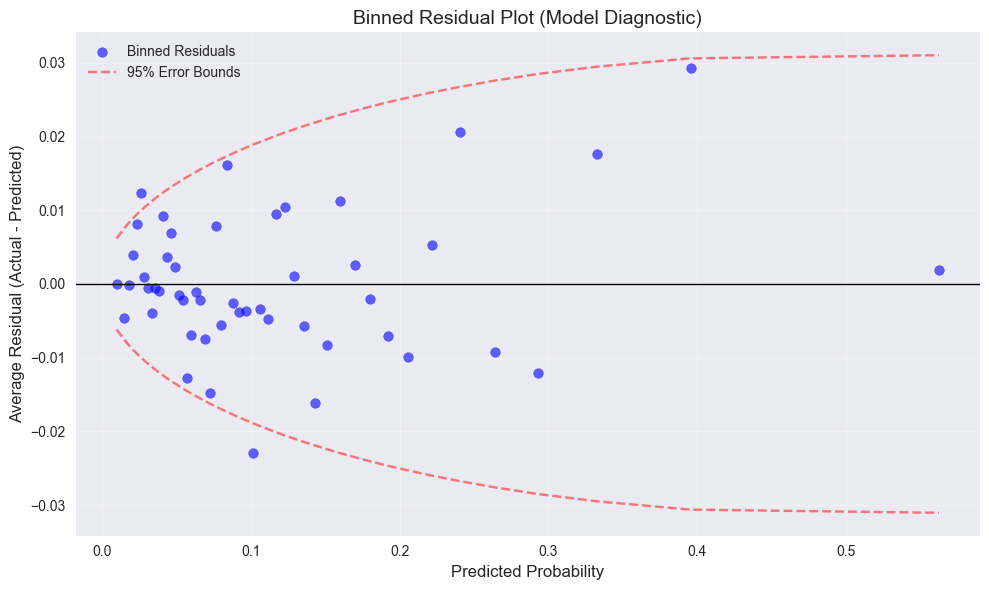

In [46]:
plot_binned_residuals(y_test, y_prob_new)